In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import geopandas as gp
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif'] = 'Noto Sans CJK TC'

### 教學
https://www.slideshare.net/ssusereaac8d/from-pandas-to-geopandas

In [2]:
villages_shp = gp.read_file("town_shp/TOWN_MOI_1060525.shp") #全台灣鄉里圖

/home/lky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


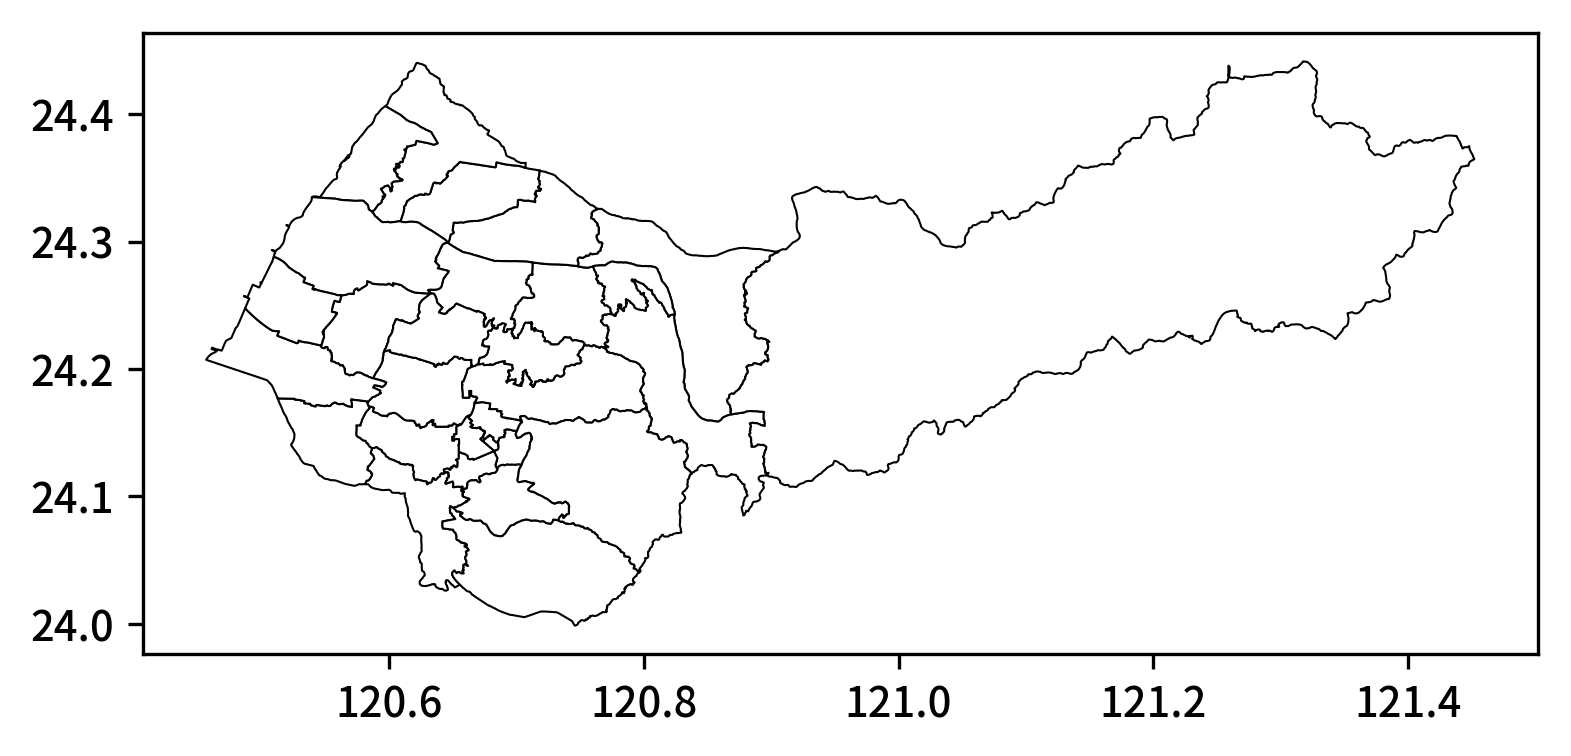

In [23]:
taichung_shp = villages_shp.query('COUNTYNAME=="臺中市"') #臺中市村里界圖
taichung_shp['dummy number'] = np.random.ranf(taichung_shp.index.size) #隨機產生臺中各區數值
taichung_shp.plot(color='white',linewidth = 0.5, edgecolor='black')
plt.show()

/home/lky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


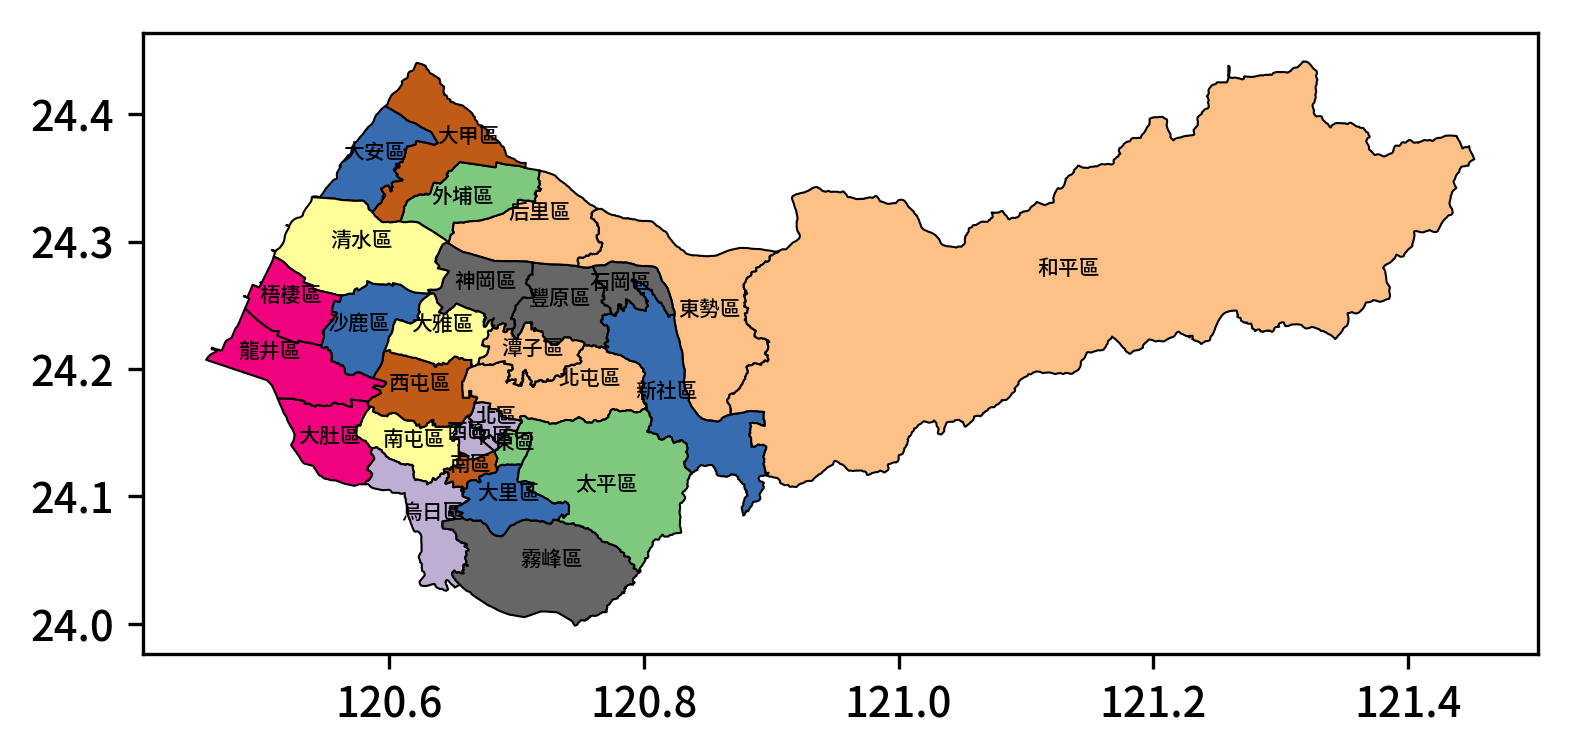

In [34]:
taichung_shp = villages_shp.query('COUNTYNAME=="臺中市"') #臺中市村里界圖
taichung_shp['dummy number'] = np.random.ranf(taichung_shp.index.size) #隨機產生臺中各區數值
taichung_shp.plot(cmap = plt.cm.Accent, column = 'dummy number',
                 linewidth = 0.5, edgecolor = 'black')
for idx, row in taichung_shp.iterrows():
    plt.annotate(
        s = row['TOWNNAME'],
        xy = row['geometry'].representative_point().coords[0],
        horizontalalignment='center',
        fontsize = 5
    )
plt.show()

In [13]:
np.random.seed(1)
df_taichung_dummy_number = pd.DataFrame(index=taichung_shp['TOWNNAME'], 
                                        data={'dummy number':np.random.ranf(
                                            taichung_shp.index.size)})
# display(df_taichung_dummy_number.T)

# def pandas_df_to_markdown_table(df):
#     from IPython.display import Markdown, display
#     fmt = ['---' for i in range(len(df.columns))]
#     df_fmt = pd.DataFrame([fmt], columns=df.columns)
#     df_formatted = pd.concat([df_fmt, df])
#     display(Markdown(df_formatted.to_csv(sep="|", index=False)))

# pandas_df_to_markdown_table(df_taichung_dummy_number.T)

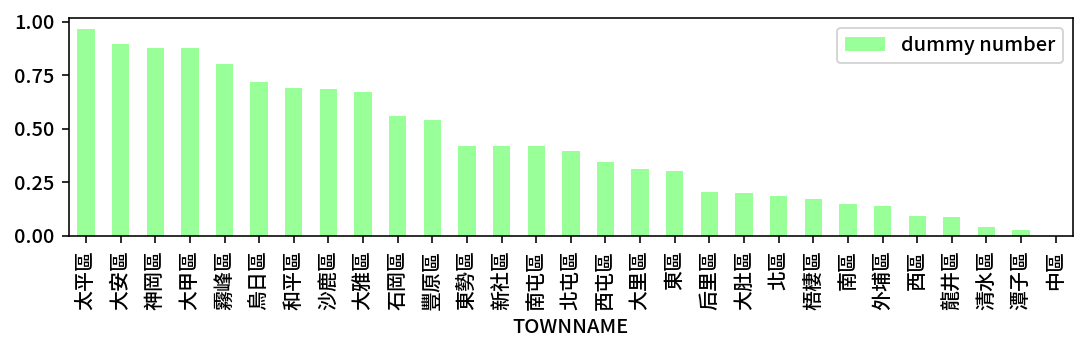

In [14]:
# plt.bar(left = df_taichung_dummy_number.index,
#         height = df_taichung_dummy_number['dummy number'].values)
df_taichung_dummy_number.sort_values(by='dummy number', ascending=False).plot.bar(color='#99FF99' , figsize=(9,2))
plt.show()

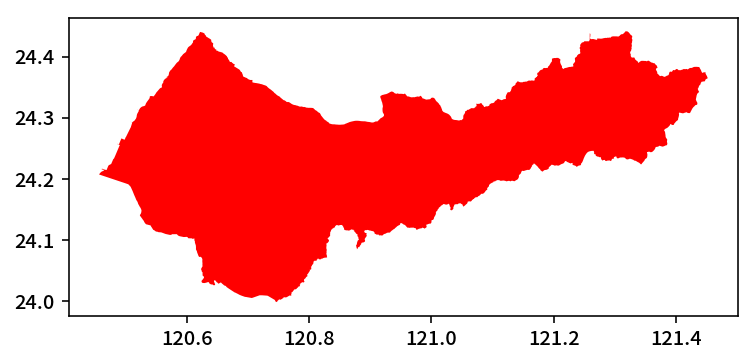

In [15]:
# 把全台中市取聯集
from shapely.ops import cascaded_union
mergedpoly = gp.GeoSeries(cascaded_union(taichung_shp['geometry']))
mergedpoly.plot(color = 'red')
plt.show()

In [16]:
# 建立以縣市為單位的 GeoDataframe
taiwan_county_shp = gp.GeoDataFrame({'COUNTYNAME':villages_shp['COUNTYNAME'].unique(),
                                      'geometry':None}, crs=villages_shp.crs)

In [17]:
# 兩種方法二選一
if(False):
    for i in taiwan_county_shp.index:
        taiwan_county_shp.iloc[i]['geometry'] = gp.GeoSeries(
            cascaded_union(
                villages_shp.query(
                    'COUNTYNAME=="{}"'.format(
                        taiwan_county_shp['COUNTYNAME'][i]))['geometry']))[0]
else:
    taiwan_county_shp = villages_shp.dissolve(by=['COUNTYNAME'])

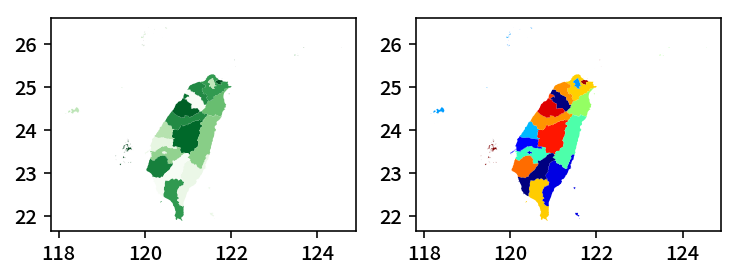

In [18]:
# 繪出台灣縣市圖
taiwan_county_shp['color'] = np.random.ranf(taiwan_county_shp.index.size)
fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
taiwan_county_shp.plot(ax = ax[0], column = 'color', cmap = plt.cm.Greens)
taiwan_county_shp.plot(ax = ax[1], column = 'color', cmap = plt.cm.jet)
plt.show()